# Processos Estocásticos: o algoritmo PageRank

Nessa aula vamos aprender sobre o algoritmo PageRAnk proposto por Sergey Brin e Larry Page para ordenar páginas na web. Esse algorimo é conhecido como o 'coração' do Google, pois o processo de busca na web se baseia nesse algoritmo.

inicialment, vamos definir o grafo que represente as páginas da web

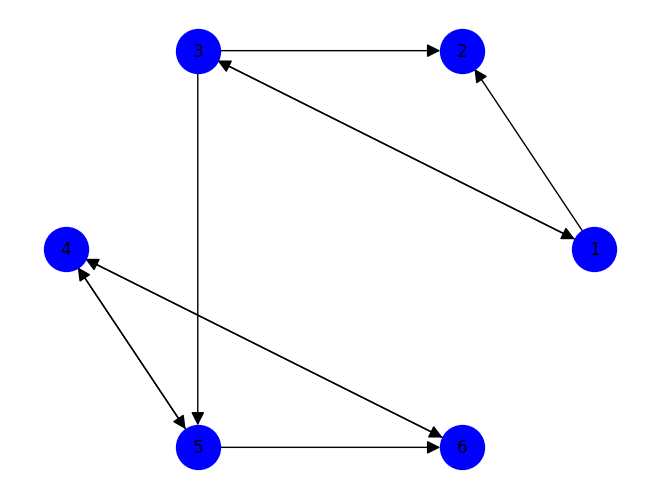

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

g = nx.DiGraph()
g.add_nodes_from([1,2,3,4,5,6])
g.add_edge(1,2)
g.add_edge(1,3)
g.add_edge(3,1)
g.add_edge(3,2)
g.add_edge(3,5)
g.add_edge(5,4)
g.add_edge(5,6)
g.add_edge(4,5)
g.add_edge(4,6)
g.add_edge(6,4)

options = {
    'node_color': 'blue',
    'node_size' : 1000,
    'width': 1,
    'arrowstyle':'-|>',
    'arrowsize': 20,
}

npos=nx.circular_layout(g, scale=1)

nx.draw(g, pos = npos, with_labels=True, **options, arrows=True)
plt.draw()
plt.show()

Transformar o grafo em uma matriz

In [7]:
A = nx.to_numpy_array(g)
print(A)

[[0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 1. 0. 0.]]


Vamos transformar a matriz em uma matriz de probabilidade de transição

In [10]:
N = A.shape[0]
P = np.zeros((N,N))
for i in range(0,N):
    for j in range(0,N):
        if (np.sum(A[i,:]) > 0):
            P[i,j] = A[i,j]/np.sum(A[i,:])
        else:
            P[i,j]= 1/N
print(P)

[[0.         0.5        0.5        0.         0.         0.        ]
 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
 [0.33333333 0.33333333 0.         0.         0.33333333 0.        ]
 [0.         0.         0.         0.         0.5        0.5       ]
 [0.         0.         0.         0.5        0.         0.5       ]
 [0.         0.         0.         1.         0.         0.        ]]


A seguir, obtemos a matriz Google:

In [11]:
G = np.zeros((N,N))
alpha = 0.9 # parametro do Google
for i in range(0,N):
    for j in range(0,N):
        G[i,j] = alpha*P[i,j] + (1 - alpha)/N

print(G)

[[0.01666667 0.46666667 0.46666667 0.01666667 0.01666667 0.01666667]
 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
 [0.31666667 0.31666667 0.01666667 0.01666667 0.31666667 0.01666667]
 [0.01666667 0.01666667 0.01666667 0.01666667 0.46666667 0.46666667]
 [0.01666667 0.01666667 0.01666667 0.46666667 0.01666667 0.46666667]
 [0.01666667 0.01666667 0.01666667 0.91666667 0.01666667 0.01666667]]


A distribuição estacinária é igual ao PageRank:

In [13]:
eigvals, eigvecs = np.linalg.eig(G.T)
eigvecl = eigvecs[:,np.isclose(eigvals, 1)]
eigvecl = eigvecl[:,0]

stationary = eigvecl / eigvecl.sum()

stationary = stationary.real

for i in range(0,N):
    print(i+1, ':', stationary[i])

1 : 0.037211965078002215
2 : 0.0539573493631032
3 : 0.041505653356233164
4 : 0.37508081510983393
5 : 0.20599833187742744
6 : 0.2862458852153999


Podemos visualizar o grafo onde o tamanha dos vértices é proporcional ao PageRank

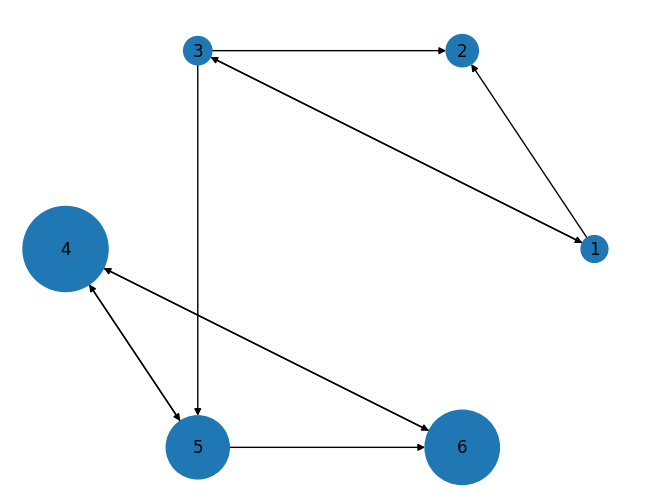

In [16]:
npos = nx.circular_layout(g,scale=1)

s = stationary*10000
nx.draw(g,pos = npos, with_labels=True, node_size = s, arrows=True)
plt.draw()
plt.show()